# **Manifold of Beta Distribution**

Authors: Sunpeng Duan and Yiliang chen


### Introduction

The differential geometric approach to probability theory and statistics has met increasing interest in theory and applications for the past years. In this approach, probability distributions are seen as elements of a differentiable manifold. And a corresponding metric structure is defined on this kind of mainifold through the choice of a Riemannian metric, such as the Fisher-Rao metric. 


Beta distributions is a family of probability distributions on $[0, 1]$ with density with respect to the Lebesgue measure parameterized by two positive scalars $\alpha, \beta > 0$,
$$p_{\alpha, \beta}(x)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1},\qquad x\in[0,1].$$

### Mathematical definition
Beta manifold is the Riemannian manifold composed of the parameter space $\Theta = \mathbb{R}^∗_+\times\mathbb{R}^∗_+$ and the Fisher metric $g^F$, denoted by the pair $(\mathcal{B},g^F)$, where $\mathcal{B}$ is the family of beta distributions
$$\mathcal{B} = \{\mathcal{B}(\alpha,\beta) = p_{\alpha,\beta}(\cdot)dx, \alpha > 0, \beta > 0\}.$$


Note: Beta manifold is a special case of Dirichlet manifold.

### Real-world Applications

In Bayesian inference, the beta distribution is the conjugate prior probability distribution for several discrete probability distributions, such as binomial distribution. Another application of beta distribution is to model percentages and proportions in genomic studies. A recent research uses the information geometry of beta distributions to compare, average, and classify histograms of medical data.

### Visualization

In [7]:
import geomstats.backend as gs
import matplotlib.pyplot as plt
from Beta_Visualization import Beta
from geomstats.information_geometry.beta import BetaDistributions

In [8]:
## create an instance of beta distribution
beta = BetaDistributions()
## create an instance of visualization of beta distribution
beta_p = Beta()

#### plot

By definition, paramters of beta manifold stays in the upper-right quadrant of Euclidean space. We can use the plot() function to define the support for $\alpha$ and $\beta$ and generate a random point that represents a beta distribution.

Points: [[10 10]]


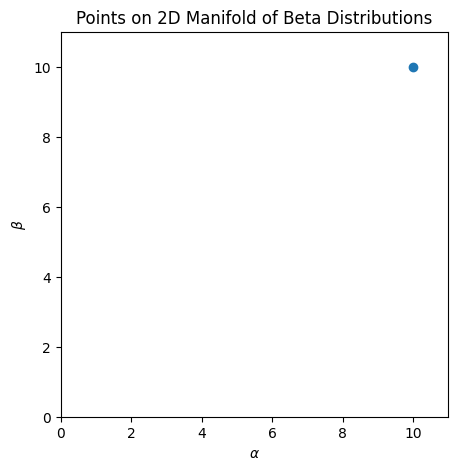

In [9]:
beta_p.plot([10,10])

#### Scatter

$\texttt{Input}$: set of points

$\texttt{Output}$: a point cloud

/Users/mariannearriola/ece594n/hw_geomviz/manifold_of_beta_distributions/Beta_Visualization.py:168: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


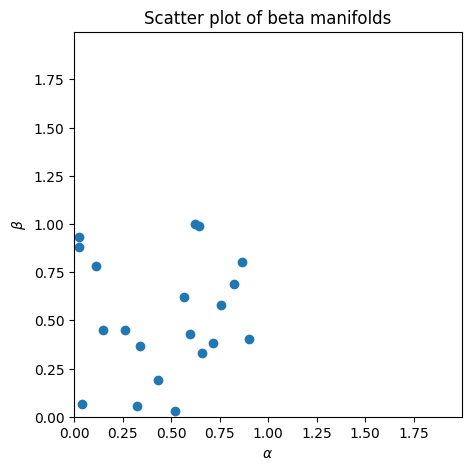

In [10]:
## randomly generate alpha and beta from uniform distribution
points = gs.random.rand(20,2)
beta_p.scatter(points)

#### plot_rendering

In [ ]:
size = [5,5]
sampling_period = 1

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
beta_p.plot_rendering(ax,size=size,sampling_period=0.5)

#### Plot of Geodesics
The fisher information matrix at $\theta$ is defined to be 
$$I(\theta) = [E\partial_il(x,\theta)\partial_jl(x,\theta)]_{i\leq i, j \leq d}$$
where $l(x, \theta) = \log p(x, \theta)$, and its matrix form is 
$$I(\alpha ,\beta) = \begin{bmatrix}
\psi'(\alpha) - \psi'(\alpha+\beta) & -\psi'(\alpha+\beta) \\
\psi'(\alpha + \beta) & \psi(\beta) - \psi'(\alpha + \beta)  
\end{bmatrix}$$
where $\psi$ denotes the digamma function i.e. $\psi(\alpha) = \frac{d}{d\alpha}\ln \Gamma(\alpha)$ 

$\texttt{Input}$: initial point and end point or initial point and initial tangent vector

$\texttt{Output}$: plot of Geodesics

In the following examples, we give the initial point $(2,3)$ and the end point $(3,2)$, and visualize the Fisher-Rao geodesics.

In [ ]:
point_a = gs.array([2.0, 3.0])
point_b = gs.array([3.0, 2.0])

TypeError: Axes.scatter() got multiple values for argument 'ax'

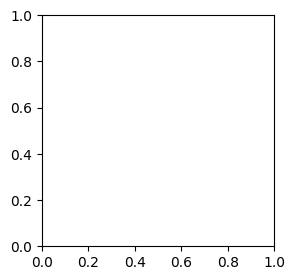

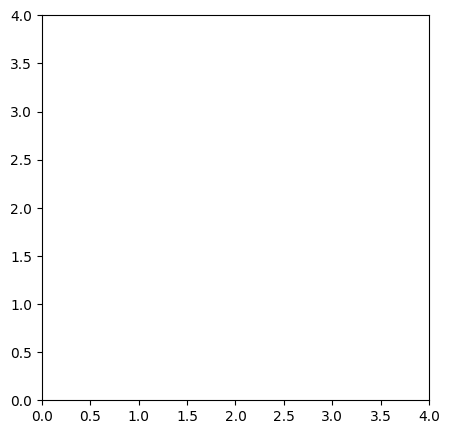

In [ ]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)
cc = gs.zeros((20, 3))
cc[:, 2] = gs.linspace(0, 1, 20)

beta_p.plot_geodesic(ax,point_a,point_b,n_points = 20,color=cc)
ax.set_xlim(0.0, 4.0)
ax.set_ylim(0.0, 4.0)
ax.set_title("Geodesic between two beta distributions for the Fisher-Rao metric");

**How to understand the geodesic of the beta manifold?**

Each point of the geodesic defines a beta distribution, and so we obtain an optimal interpolation between the distributions corresponding to point_a and point_b.

In [ ]:
point_a = gs.array([2.0, 3.0])
point_b = gs.array([3.0, 2.0])

n_points = 20
t = gs.linspace(0, 1, n_points)

pdfs = beta.point_to_pdf(beta.metric.geodesic(point_a,point_b)(t))
x = gs.linspace(0.0, 1.0, 100)

fig = plt.figure(figsize=(10, 5))
cc = gs.zeros((n_points, 3))
cc[:, 2] = gs.linspace(0, 1, n_points)
for i in range(n_points):
    plt.plot(x, pdfs(x)[:, i], color=cc[i, :])
plt.title("Corresponding interpolation between pdfs");

The geodescics $t \rightarrow (x(t), y(t))$ of the beta parameter space $\Theta$ are solutions of 
\begin{align*}
\ddot{x} + a(x,y)\dot{x}^2 +  b(x,y)\dot{x}\dot{y} + c(x,y)\dot{y}^2 &= 0 \\
\ddot{y} + a(y,x)\dot{y}^2 +  b(y,x)\dot{x}\dot{y} + c(y,x)\dot{x}^2 &= 0
\end{align*}

No closed form for the geodescis is known, but they can be computed numerically by solving above equations. Due to the symmetry of the metric respect to parameters $\alpha$ and $\beta$, the line of equation $x = y$ is geodesic, where the parameterization is fixed by the unique equation given above.

#### Plot of Geodesic Ball


$\texttt{Input}$: initial point and a set of tangent vectors.

$\texttt{Output}$: plot of Geodesic ball.

The distance between two beta distribution is defined as the geodesic distance 

#### plot_grid

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
beta_p.plot_grid(ax, initial_point=[1,1],size=[4,4],n_points=10,step=1)

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
beta_p.plot_grid(ax, initial_point=[1,1],size=[2,2],n_points=10,step=2)

In [ ]:
## initial point: (2,2), which is the center
## initial_vectors: a set of tangent vectors
n_rays = 50
center = gs.array([2.0, 2.0])
theta = gs.linspace(-gs.pi, gs.pi, n_rays)
directions = gs.transpose(gs.stack((gs.cos(theta), gs.sin(theta))))

ray_length = 0.25
direction_norms = beta.metric.squared_norm(directions, center) ** (1 / 2)
unit_vectors = directions / gs.expand_dims(direction_norms, 1)
initial_vectors = ray_length * unit_vectors

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
beta_p.plot_geodestic_ball(ax,center,initial_vectors)
ax.set_xlim(1, 3)
ax.set_ylim(1, 3)
ax.set_title("Geodesic ball of the space of beta distributions");

### Reference

A. Le Brigant and S. Puechmorel, The Fisher-Rao geometry of beta distributions applied to
the study of canonical moments. 2019. <a href="https://hal.archives-ouvertes.fr/hal-02100897" target="_blank">hal-02100897</a>

A. Le Brigant, N. Guigui, S. Rebbah and S. Puechmorel, Classifying histograms of medical data using information geometry of beta distributions. IFAC-PapersOnLine, Vol. 54, No. 9, 514-520, 2021.

Shengping Yang & Zhide Fang (2017) Beta approximation of ratio distribution and its application to next generation sequencing read counts, Journal of Applied Statistics, 44:1,
57-70, DOI: 10.1080/02664763.2016.1158798